# Cross-validation

# Overfitting the test set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [2]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print("Validation: {:.3f}".format(knn.score(X_val, y_val)))
print("Test: {:.3f}".format(knn.score(X_test, y_test)))

Validation: 0.972
Test: 0.979


In [3]:
val = []
test = []

for i in range(1000):
    rng = np.random.RandomState(i)
    noise = rng.normal(scale=.1, size=X_train.shape)
    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train + noise, y_train)
    val.append(knn.score(X_val, y_val))
    test.append(knn.score(X_test, y_test))

print("Validation: {:.3f}".format(np.max(val)))
print("Test: {:.3f}".format(test[np.argmax(val)]))

Validation: 0.991
Test: 0.993


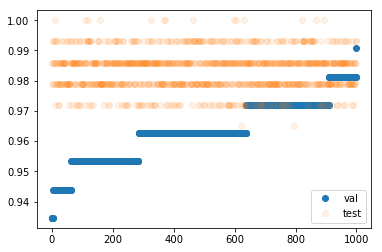

In [4]:
plt.figure()
sorting = np.argsort(val)
plt.plot(np.array(val)[sorting], "o", label="val")
plt.plot(np.array(test)[sorting], "o", label="test", alpha=.1)

plt.legend()

In [6]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.972
best n_neighbors: 5
test-set score: 0.993


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
import numpy as np

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=5)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))

Grid Searches
=================

Grid-Search with build-in cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:

In [ ]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

A GridSearchCV object behaves just like a normal classifier.

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.predict(X_test)

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.

In [ ]:
# %load solutions/grid_search_k_neighbors.py

## Evaluation Metrics and scoring

### Metrics for binary classification

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/bank-campaign.csv")
X = data.drop("target", axis=1).values
y = data.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("predicted labels: %s" % np.unique(pred_most_frequent))
print("score: %f" % dummy_majority.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))

# Confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

In [ ]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

##### Relation to accuracy
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

#### Precision, recall and f-score
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [ ]:
from sklearn.metrics import f1_score
print("f1 score most frequent: %.2f" % f1_score(y_test, pred_most_frequent, pos_label="yes"))
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy, pos_label="yes"))
print("f1 score tree: %.2f" % f1_score(y_test, pred_tree, pos_label="yes"))
print("f1 score logreg: %.2f" % f1_score(y_test, pred_logreg, pos_label="yes"))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["no", "yes"]))

In [ ]:
print(classification_report(y_test, pred_tree,
                            target_names=["no", "yes"]))

In [ ]:
print(classification_report(y_test, pred_logreg,
                            target_names=["no", "yes"]))

# Taking uncertainty into account

In [ ]:
from mglearn.datasets import make_blobs 
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)                                     


In [ ]:
mglearn.plots.plot_decision_threshold()

In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

In [ ]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_lower_threshold))

## Precision-Recall curves and ROC curves

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))

In [ ]:
# create a similar dataset as before, but with more samples to get a smoother curve
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.figure()
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("precision_recall_curve");
plt.legend(loc="best")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.title("precision_recall_comparison");

In [ ]:
print("f1_score of random forest: %f" % f1_score(y_test, rf.predict(X_test)))
print("f1_score of svc: %f" % f1_score(y_test, svc.predict(X_test)))

In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("average precision of random forest: %f" % ap_rf)
print("average precision of svc: %f" % ap_svc)

# Receiver Operating Characteristics (ROC) and AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.figure()

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve");
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve_comparison");
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [ ]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: %f" % rf_auc)
print("AUC for SVC: %f" % svc_auc)

In [ ]:
X = data.drop("target", axis=1).values
y = data.target.values
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, train_size=.1, test_size=.1)

plt.figure()

for gamma in [1, 0.01, 0.001]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test == "yes", svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test), pos_label="yes")
    print("gamma = %.03f  accuracy = %.02f  AUC = %.02f" % (gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma=%.03f" % gamma, linewidth=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### Multi-class classification

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
print("confusion matrix:")
print(confusion_matrix(y_test, pred))

In [ ]:
plt.figure()
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label',
                                     xticklabels=digits.target_names, yticklabels=digits.target_names,
                                     cmap=plt.cm.gray_r, fmt="%d")    

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("micro average f1 score: %f" % f1_score(y_test, pred, average="micro"))
print("macro average f1 score: %f" % f1_score(y_test, pred, average="macro"))

## Using evaluation metrics in model selection

In [ ]:
from sklearn.model_selection import cross_val_score
# default scoring for classification is accuracy
print("default scoring ", cross_val_score(SVC(), X, y))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("explicit accuracy scoring ", explicit_accuracy)
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring ", roc_auc)

In [ ]:
from sklearn.model_selection import GridSearchCV

# back to the bank campaign
X = data.drop("target", axis=1).values
y = data.target.values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=.1, test_size=.1, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))


In [ ]:
from sklearn.metrics.scorer import SCORERS
print(sorted(SCORERS.keys()))

# Exercises
Load the adult dataset from ``data/adult.csv``, and split it into training and test set.
Apply grid-search to the training set, searching for the best C for Logistic Regression.
Plot the ROC curve of the best model on the test set.

# Cross validation

In [22]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.967
best n_neighbors: 9
test-set score: 0.965


<IPython.core.display.Javascript object>


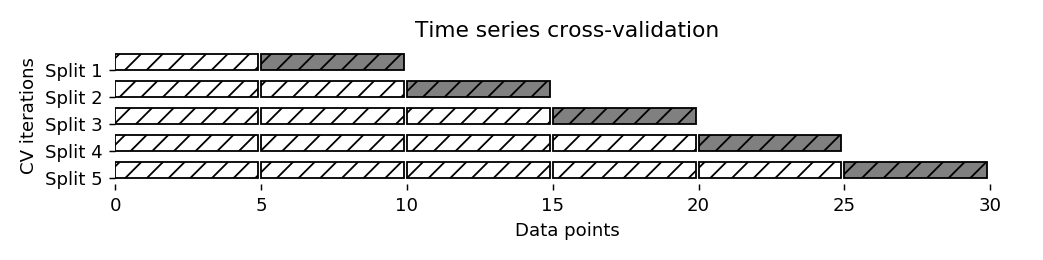

In [23]:
plt.figure(figsize=(8, 2))
plt.title("Time series cross-validation")
# don't think too much about how this figure is generated ...
axes = plt.gca()
axes.set_frame_on(False)

n_folds = 5
n_samples = 25

n_samples_per_fold = n_samples / float(n_folds)


for i in range(n_folds + 1):
    therange = range(max(i - 1, 0), n_folds)
    colors = ["w"] * len(therange)
    if i != 0:
        colors[0] = "grey"
    
    bars = plt.barh(bottom=therange, width=[n_samples_per_fold - 0.1] * len(therange),
           left=i * n_samples_per_fold, height=.6, color=colors, hatch="//", edgecolor='k')
axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1 + n_samples_per_fold)
plt.ylabel("CV iterations")
plt.xlabel("Data points")
plt.yticks(np.arange(n_folds) + .3, ["Split %d" % x for x in range(1, n_folds + 1)])
plt.legend([bars[0], bars[-1]], ['Training data', 'Test data'], loc=(1.05, 0.4), frameon=False);
plt.tight_layout()

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)

print("KFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))

print("StratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=skfold)))

print("ShuffleSplit:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=ss)))


KFold:
[ 0.92982456  0.95614035  0.96491228  0.98245614  0.96460177]
StratifiedKFold:
[ 0.9826087   0.97391304  0.97345133  0.94690265  0.97345133]
ShuffleSplit:
[ 0.96491228  0.95321637  0.97660819  0.94736842  0.98245614  0.93567251
  0.94152047  0.96491228  0.95321637  0.97076023  0.94736842  0.92982456
  0.94736842  0.95906433  0.95321637  0.93567251  0.94736842  0.97660819
  0.96491228  0.95321637]


# GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors':  np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.967
best parameters: {'n_neighbors': 9}
test-set score: 0.993


In [26]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)

In [27]:
results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_n_neighbors', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [28]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

In [29]:
len(results)

7

<IPython.core.display.Javascript object>


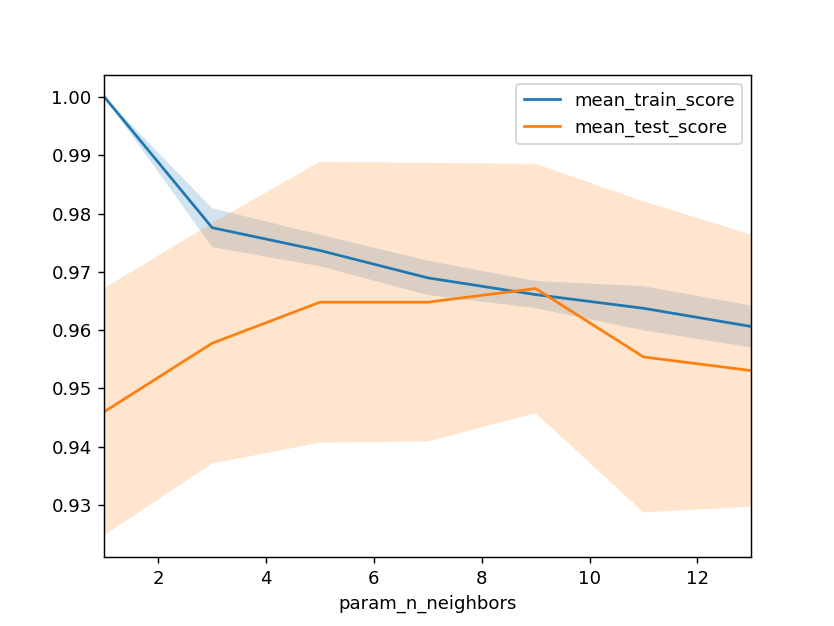

In [30]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

In [ ]:
# at least look at roc curve, pr curve, and do grid-search using AUC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Problems with accuracy and unbalanced data

In [2]:
def plot_confusion_matrix(values, xlabel="predicted labels", ylabel="true labels", xticklabels=None,
                          yticklabels=None, cmap=None, vmin=None, vmax=None, ax=None,
                          fmt="{:.2f}", xtickrotation=45, norm=None):
    """Plot a matrix as heatmap with explicit numbers.
    Parameters
    ----------
    values : ndarray
        Two-dimensional array to visualize.
    xlabel : string, default=""
        Label for the x-axis.
    ylabel : string, default=""
        Label for the y-axis.
    xticklabels : list of string or None, default=None
        Tick labels for the x-axis.
    yticklabels : list of string or None, default=None
        Tick labels for the y-axis
    cmap : string or colormap
        Matpotlib colormap to use.
    vmin : int, float or None
        Minimum clipping value.
    vmax : int, float or None
        Maximum clipping value.
    ax : axes object or None
        Matplotlib axes object to plot into. If None, the current axes are
        used.
    fmt : string, default="{:.2f}"
        Format string to convert value to text.
    xtickrotation : float, default=45
        Rotation of the xticklabels.
    norm : matplotlib normalizer
        Normalizer passed to pcolor
    """
    import matplotlib.pyplot as plt
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(values, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
    # this will allow us to access the pixel values:
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xlim(0, values.shape[1])
    ax.set_ylim(0, values.shape[0])

    if xticklabels is None:
        xticklabels = [""] * values.shape[1]
    if yticklabels is None:
        yticklabels = [""] * values.shape[0]

    # +.5 makes the ticks centered on the pixels
    ax.set_xticks(np.arange(values.shape[1]) + .5)
    ax.set_xticklabels(xticklabels, ha="center", rotation=xtickrotation)
    ax.set_yticks(np.arange(values.shape[0]) + .5)
    ax.set_yticklabels(yticklabels, va="center")
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            # pixel bright: use black for number
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt.format(value), color=c, ha="center", va="center")
    ax.invert_yaxis()
    return ax

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))

[[49  4]
 [ 5 85]]
0.937062937063


In [4]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

In [5]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


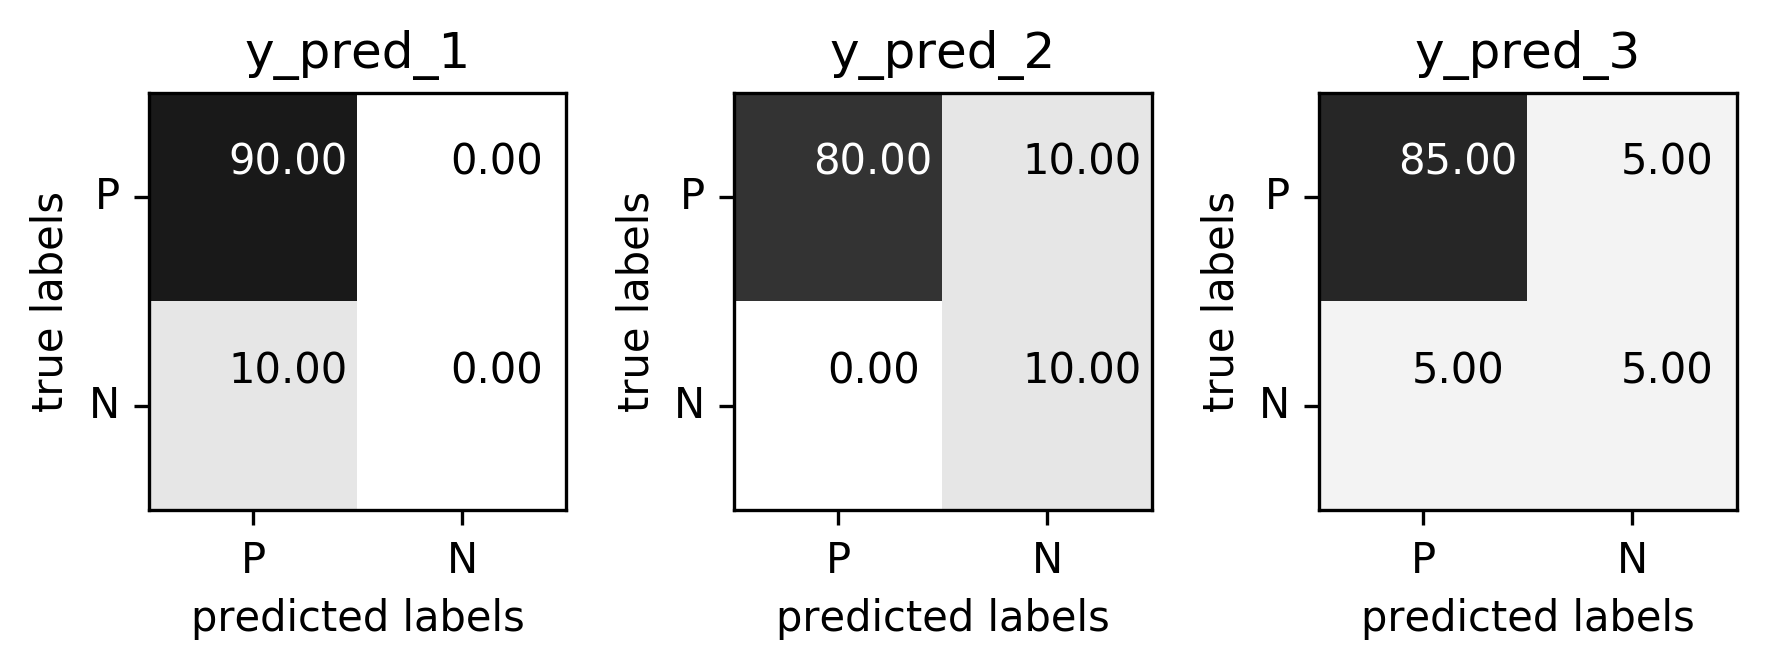

In [6]:
fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,
                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)
    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

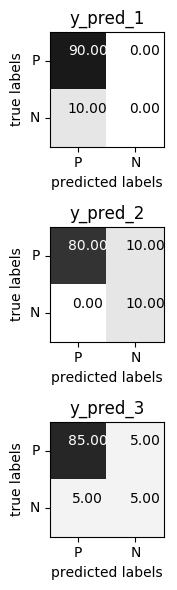

In [7]:
fig, axes = plt.subplots(3, dpi=100, figsize=(3, 6))

for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):

    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,

                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)

    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

In [8]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95        90
          1       0.00      0.00      0.00        10

avg / total       0.81      0.90      0.85       100

             precision    recall  f1-score   support

          0       1.00      0.89      0.94        90
          1       0.50      1.00      0.67        10

avg / total       0.95      0.90      0.91       100

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        90
          1       0.50      0.50      0.50        10

avg / total       0.90      0.90      0.90       100



/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1126: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
# logistic regresson on breast cancer, but change threshold:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.92      0.92        53
          1       0.96      0.94      0.95        90

avg / total       0.94      0.94      0.94       143



In [10]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        53
          1       1.00      0.89      0.94        90

avg / total       0.94      0.93      0.93       143



# Precision recall curves

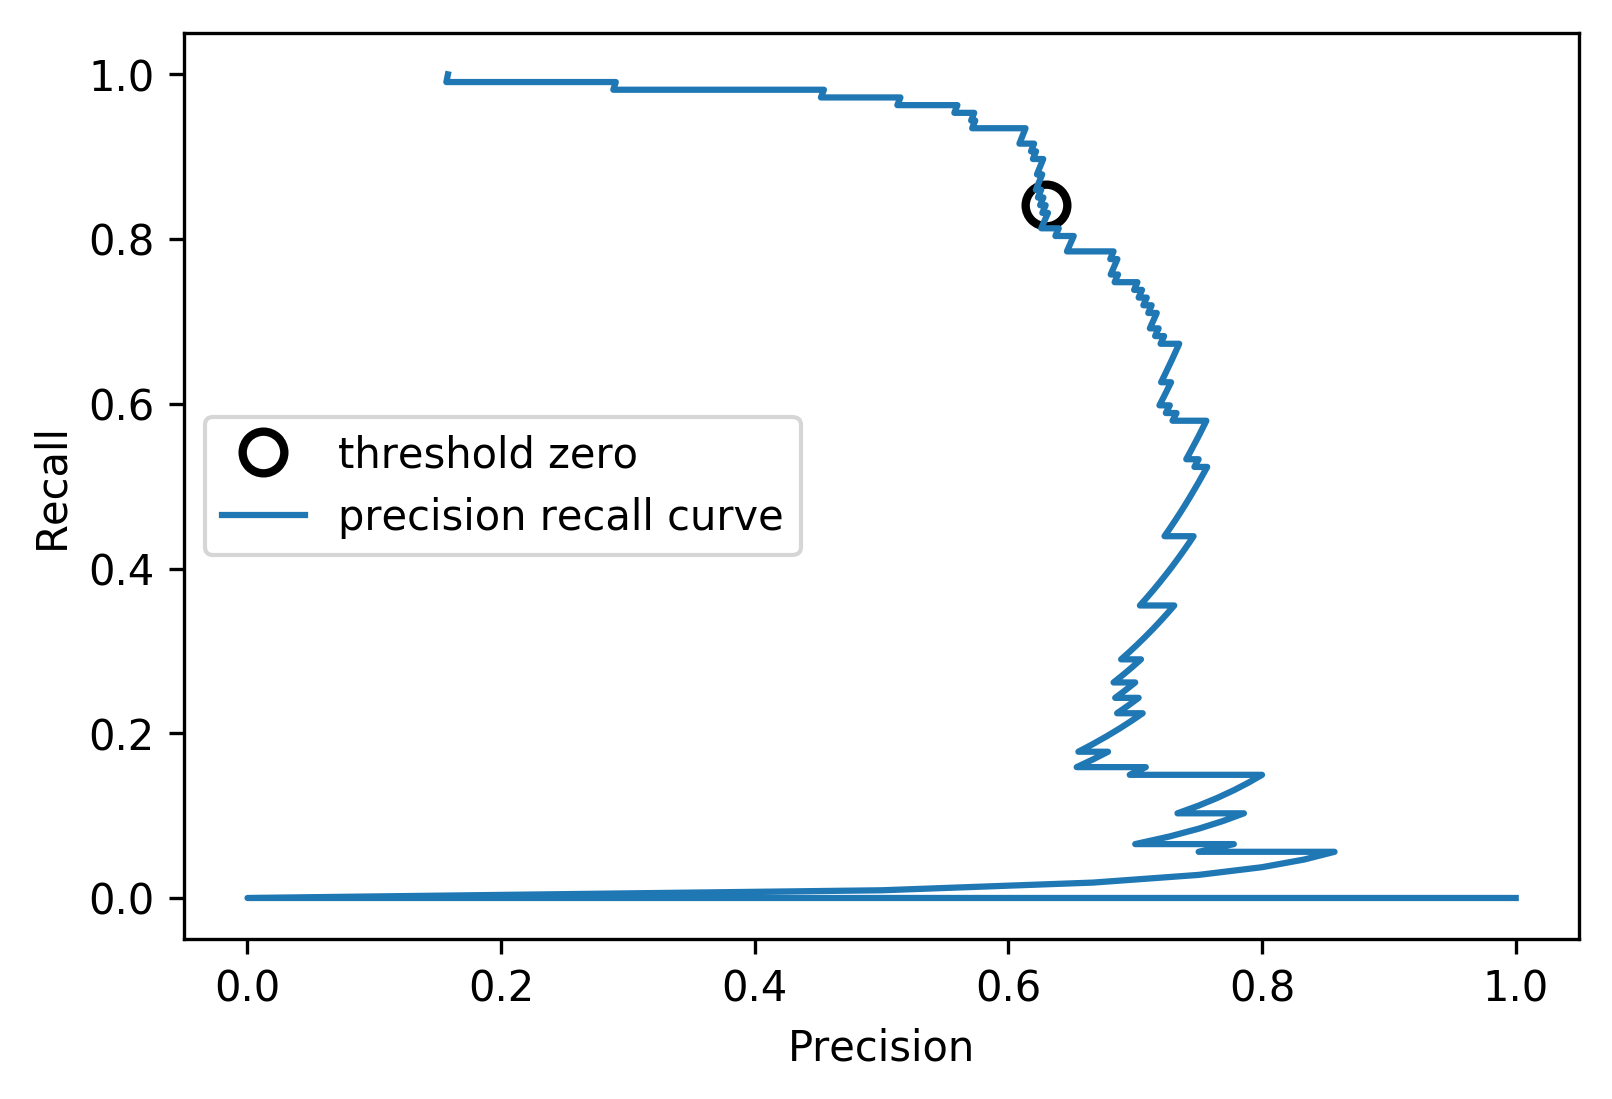

In [22]:
# this will look different on master, I'm using a branch with a bugfix!

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve

X, y = make_blobs(n_samples=5000, centers=2, cluster_std=[7.0, 2],
                  random_state=22, shuffle=False)
# make classes imbalanced
X, y = X[:3000], y[:3000]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

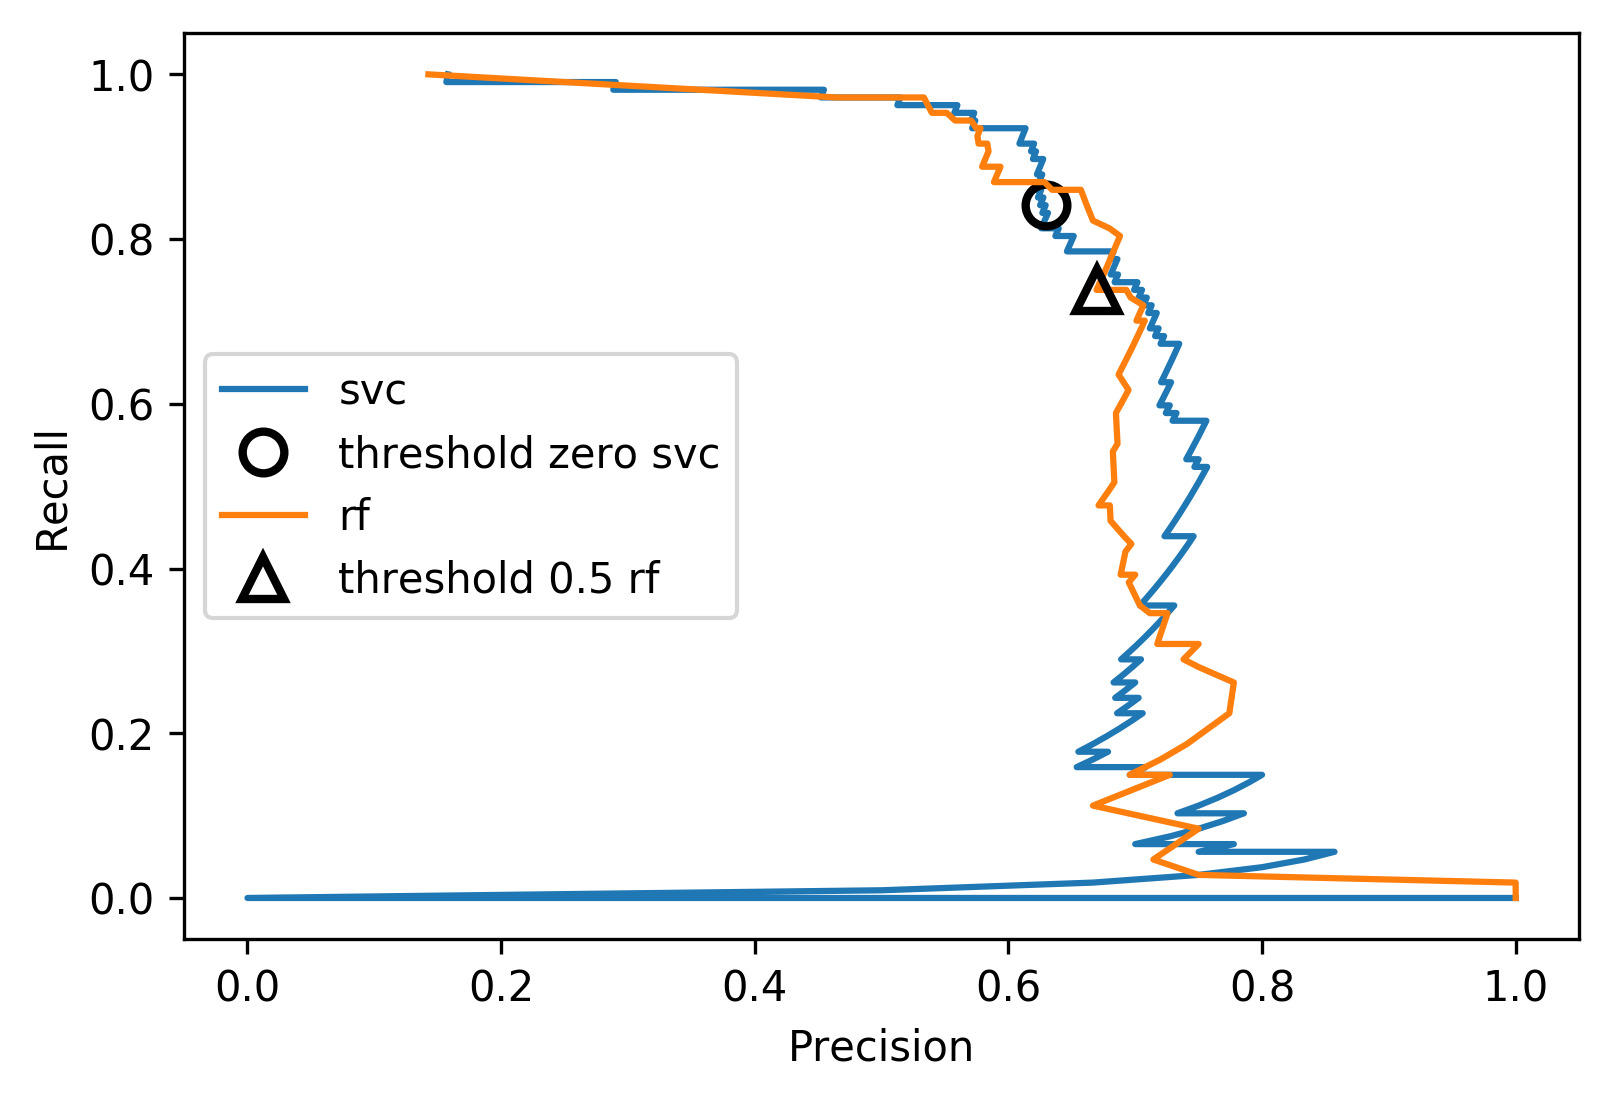

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# F1 vs average precision

In [24]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(
      f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.709
f1_score of svc: 0.715


In [25]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.682
Average precision of svc: 0.693


# ROC CURVE

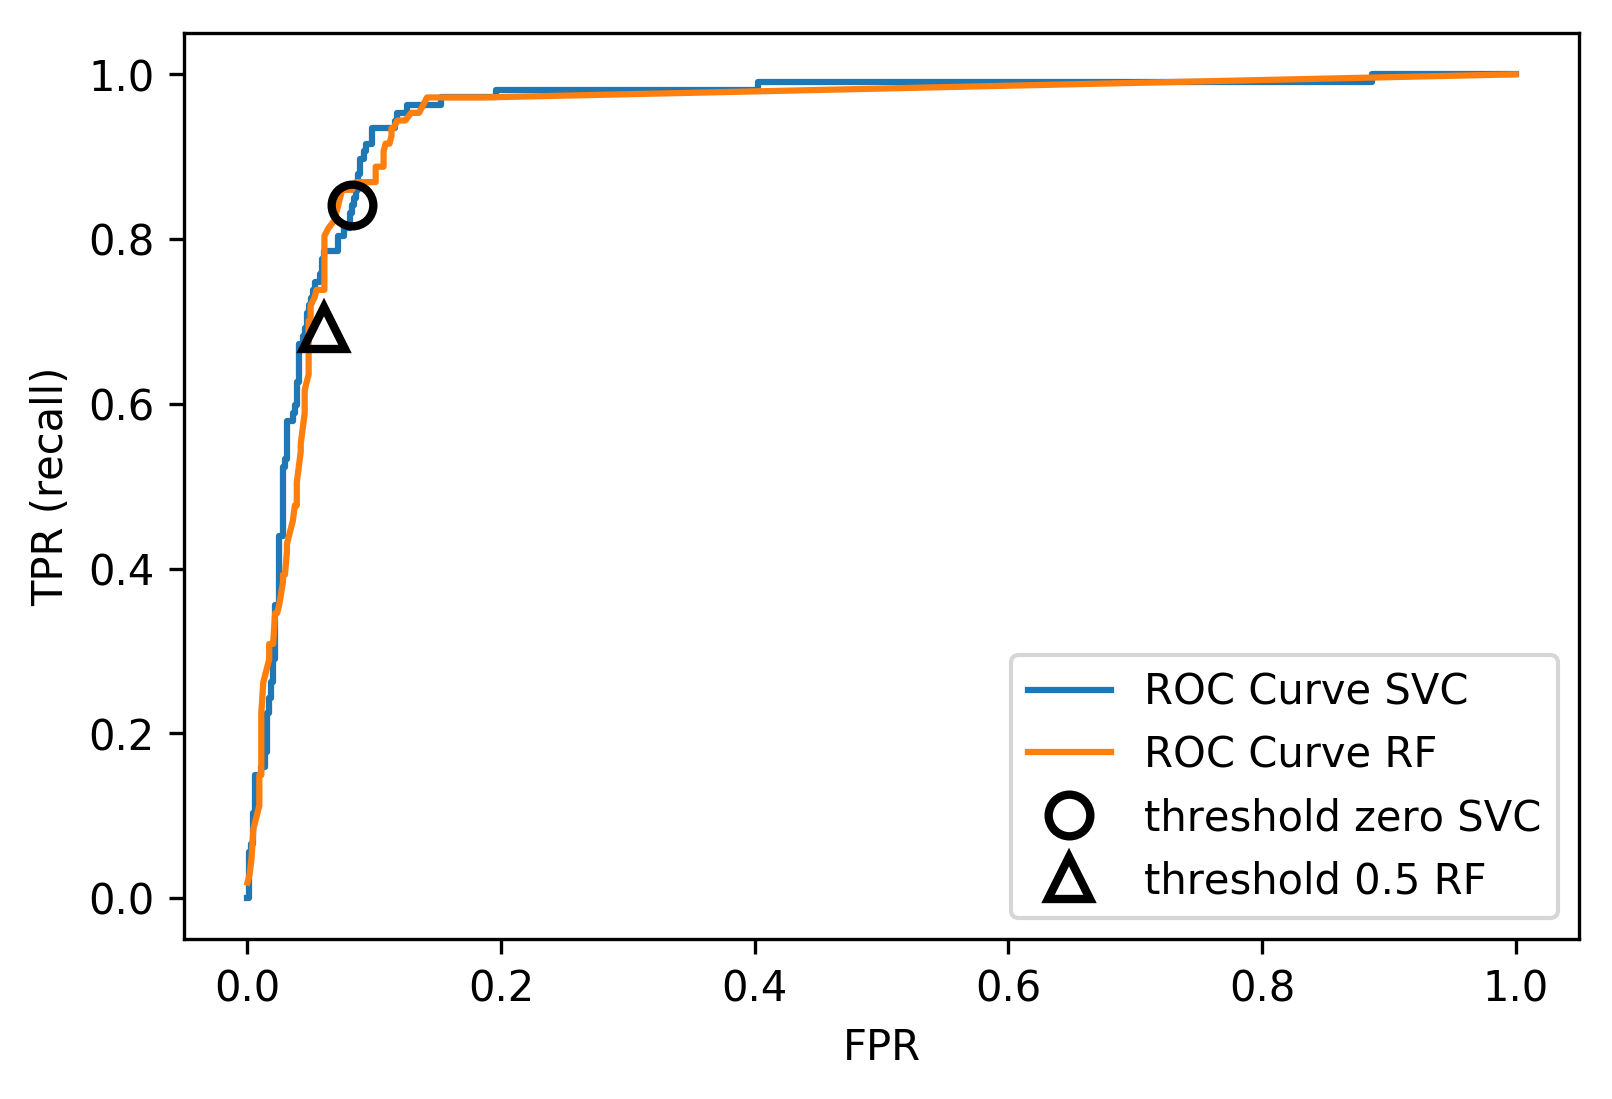

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

# Multi-class

In [35]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.964
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  1  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  2  0  0  1 44]]


In [36]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      0.95      0.93        43
          2       0.98      1.00      0.99        44
          3       1.00      0.96      0.98        45
          4       0.97      0.97      0.97        38
          5       0.94      0.98      0.96        48
          6       0.98      0.98      0.98        52
          7       0.98      0.98      0.98        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.96      0.96      0.96       450



# with cross-validation

In [32]:
X = digits.data / 16.   # data is between 0 and 16
# 9 vs rest
y = digits.target == 9

# default scoring for classification is accuracy
scores_default = cross_val_score(SVC(), X, y)

# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), X, y, scoring="accuracy")

# using ROC AUC
roc_auc =  cross_val_score(SVC(), X, digits.target == 9, scoring="roc_auc")

print("Default scoring: {}".format(scores_default))
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
print("AUC scoring: {}".format(roc_auc))

Default scoring: [ 0.9  0.9  0.9]
Explicit accuracy scoring: [ 0.9  0.9  0.9]
AUC scoring: [ 0.994  0.99   0.996]


In [33]:
from sklearn.metrics.scorer import SCORERS
print("\n".join(sorted(SCORERS.keys())))

accuracy
adjusted_rand_score
average_precision
f1
f1_macro
f1_micro
f1_samples
f1_weighted
log_loss
mean_absolute_error
mean_squared_error
median_absolute_error
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc


In [34]:
def few_support_vectors(est, X, y):
    acc = est.score(X, y)
    frac_sv = len(est.support_) / np.max(est.support_)
    # I just made this up, don't actually use this
    return acc / frac_sv

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))
print(len(grid.best_estimator_.support_))

{'C': 10.0, 'gamma': 0.074239049740163321}
0.991111111111
498


In [46]:
param_grid = {'C': np.logspace(-3, 2, 6),
              'gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10, scoring=few_support_vectors)
grid.fit(X_train, y_train)
print(grid.best_params_)
print((grid.predict(X_test) == y_test).mean())
print(len(grid.best_estimator_.support_))

{'C': 100.0, 'gamma': 0.0074239049740163323}
0.977777777778
405


# Regression metrics

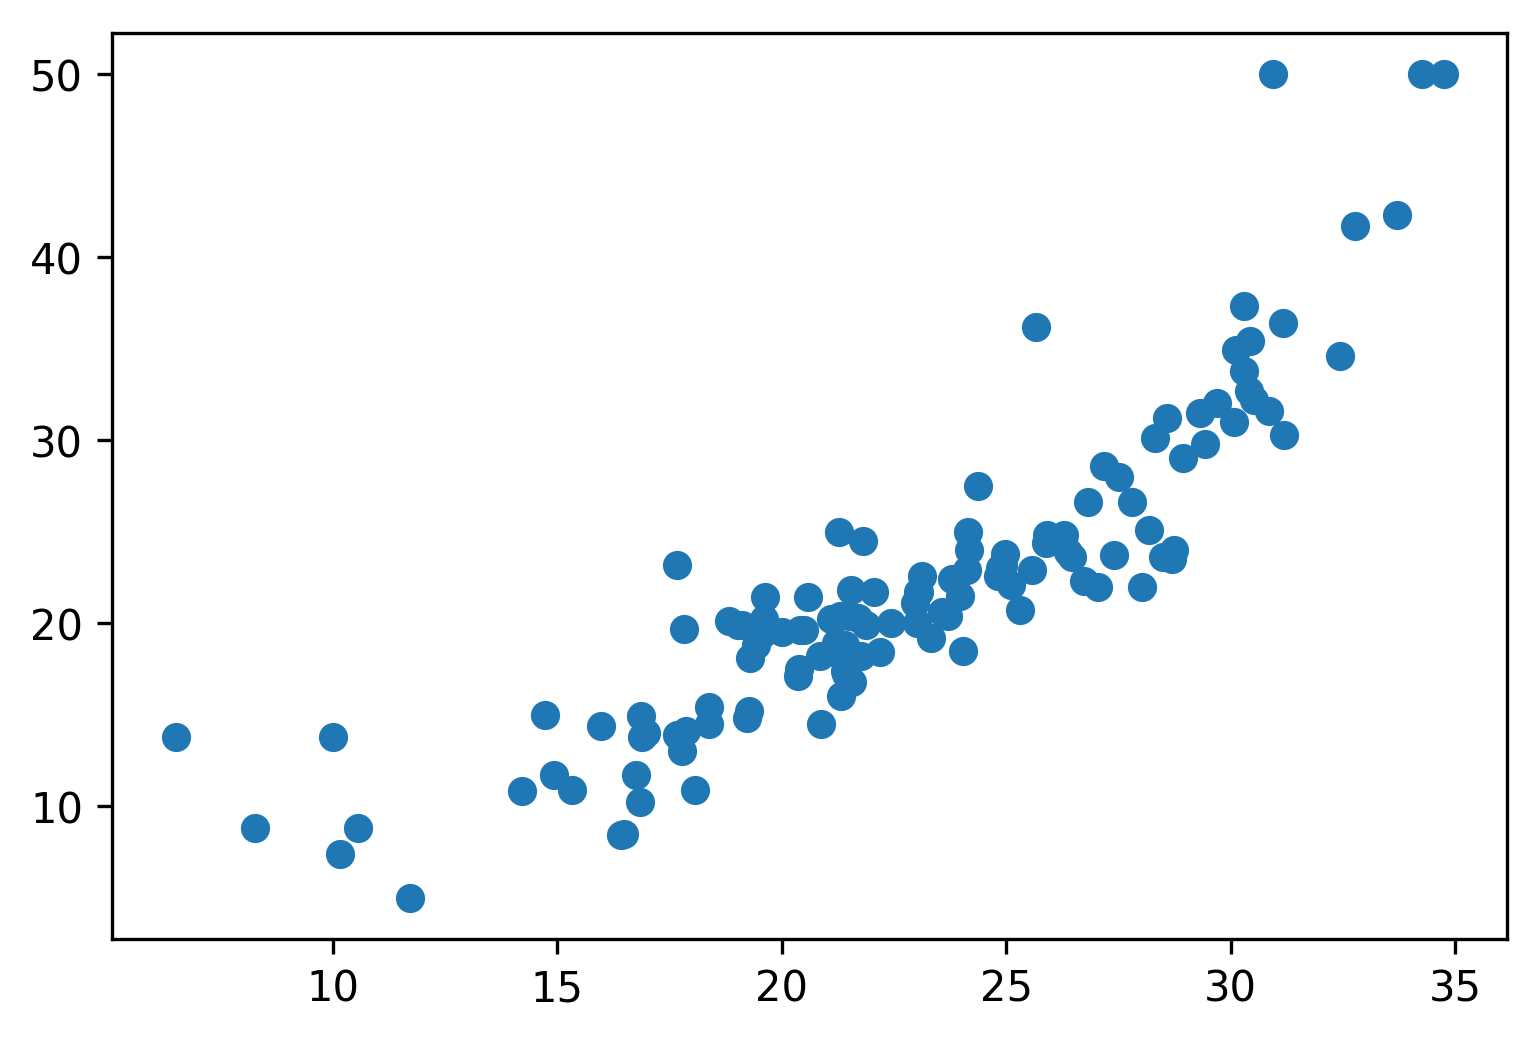

In [91]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

ridge = Ridge(normalize=True).fit(X_train, y_train)
pred = ridge.predict(X_test)
plt.plot(pred, y_test, 'o')

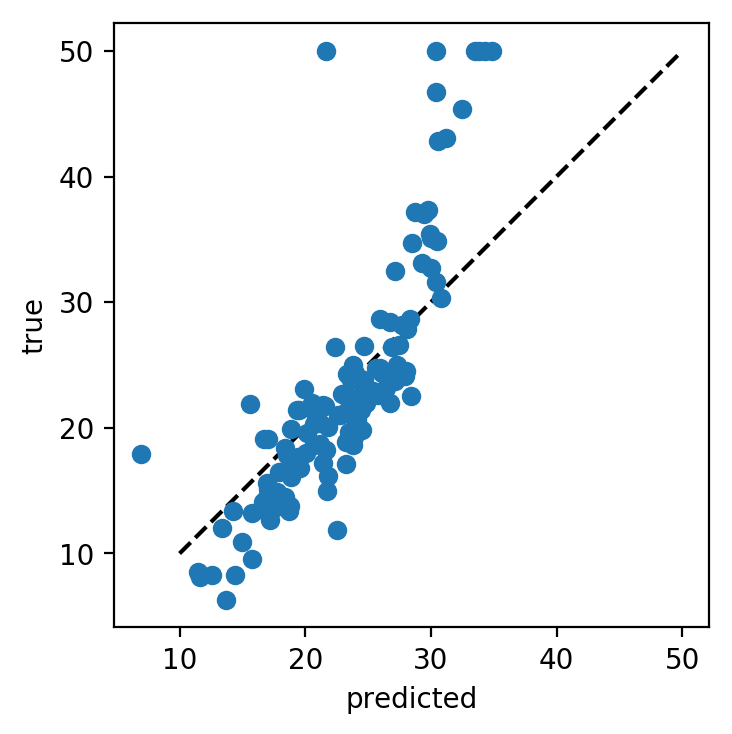

In [89]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([10, 50], [10, 50], '--', c='k')
plt.plot(pred, y_test, 'o')
plt.xlabel("predicted")
plt.ylabel("true")

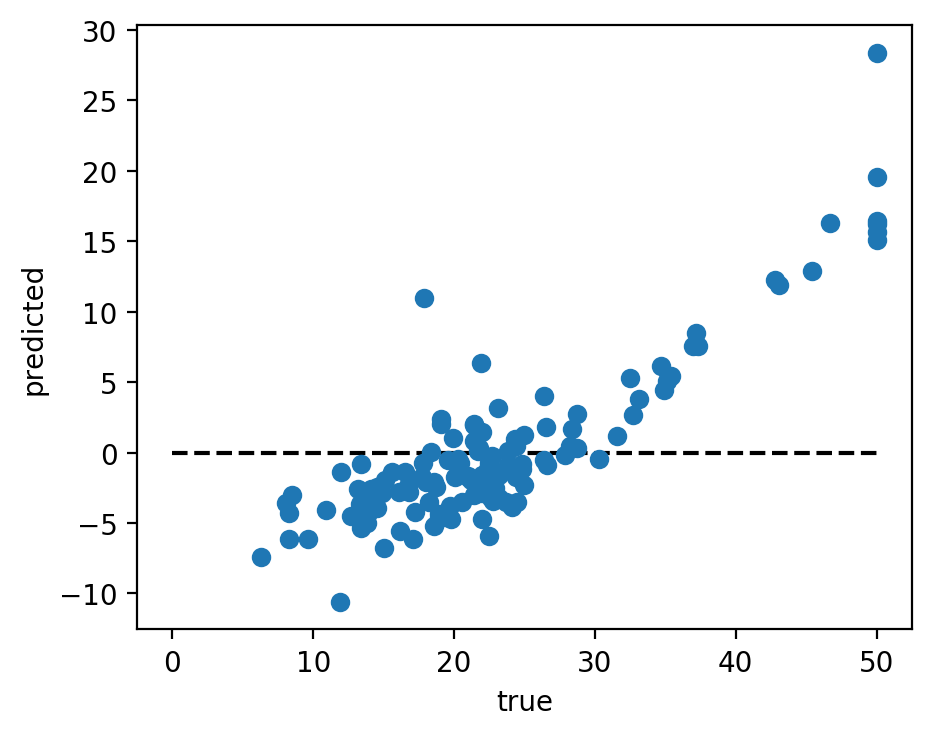

In [90]:
plt.figure(dpi=200)
plt.gca().set_aspect("equal")
plt.plot([0, 50], [0, 0], '--', c='k')
plt.plot(y_test, y_test - pred, 'o')
plt.xlabel("true")
plt.ylabel("predicted")

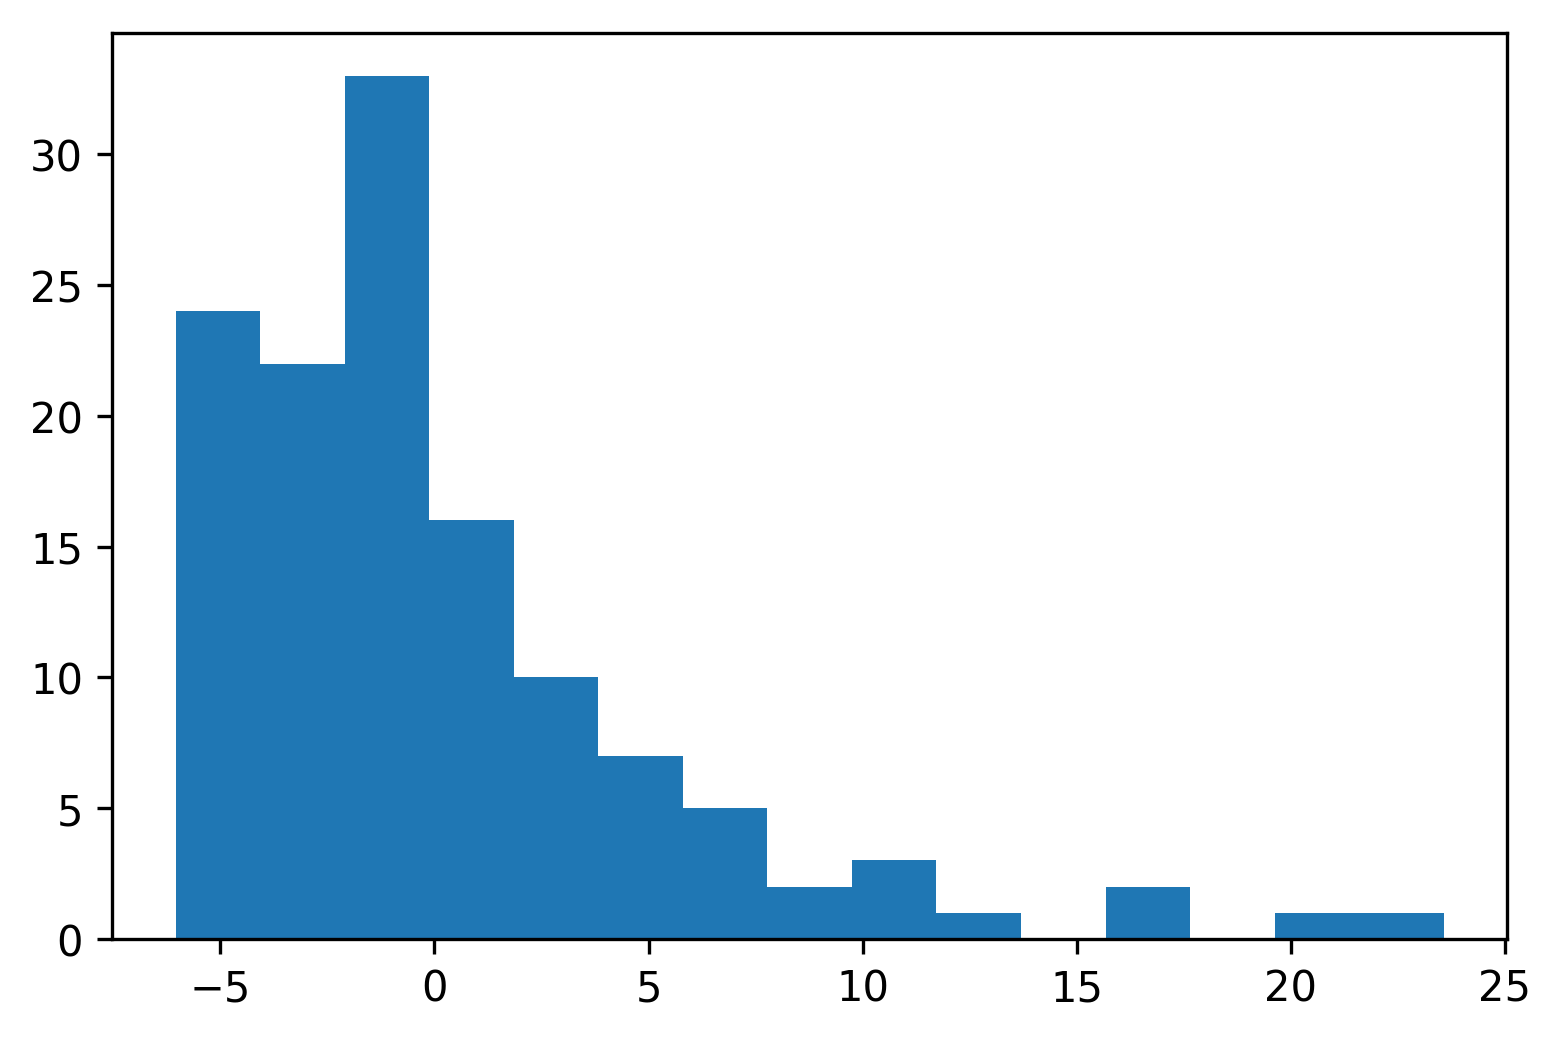

In [60]:
plt.hist(y_test - pred, bins="auto");

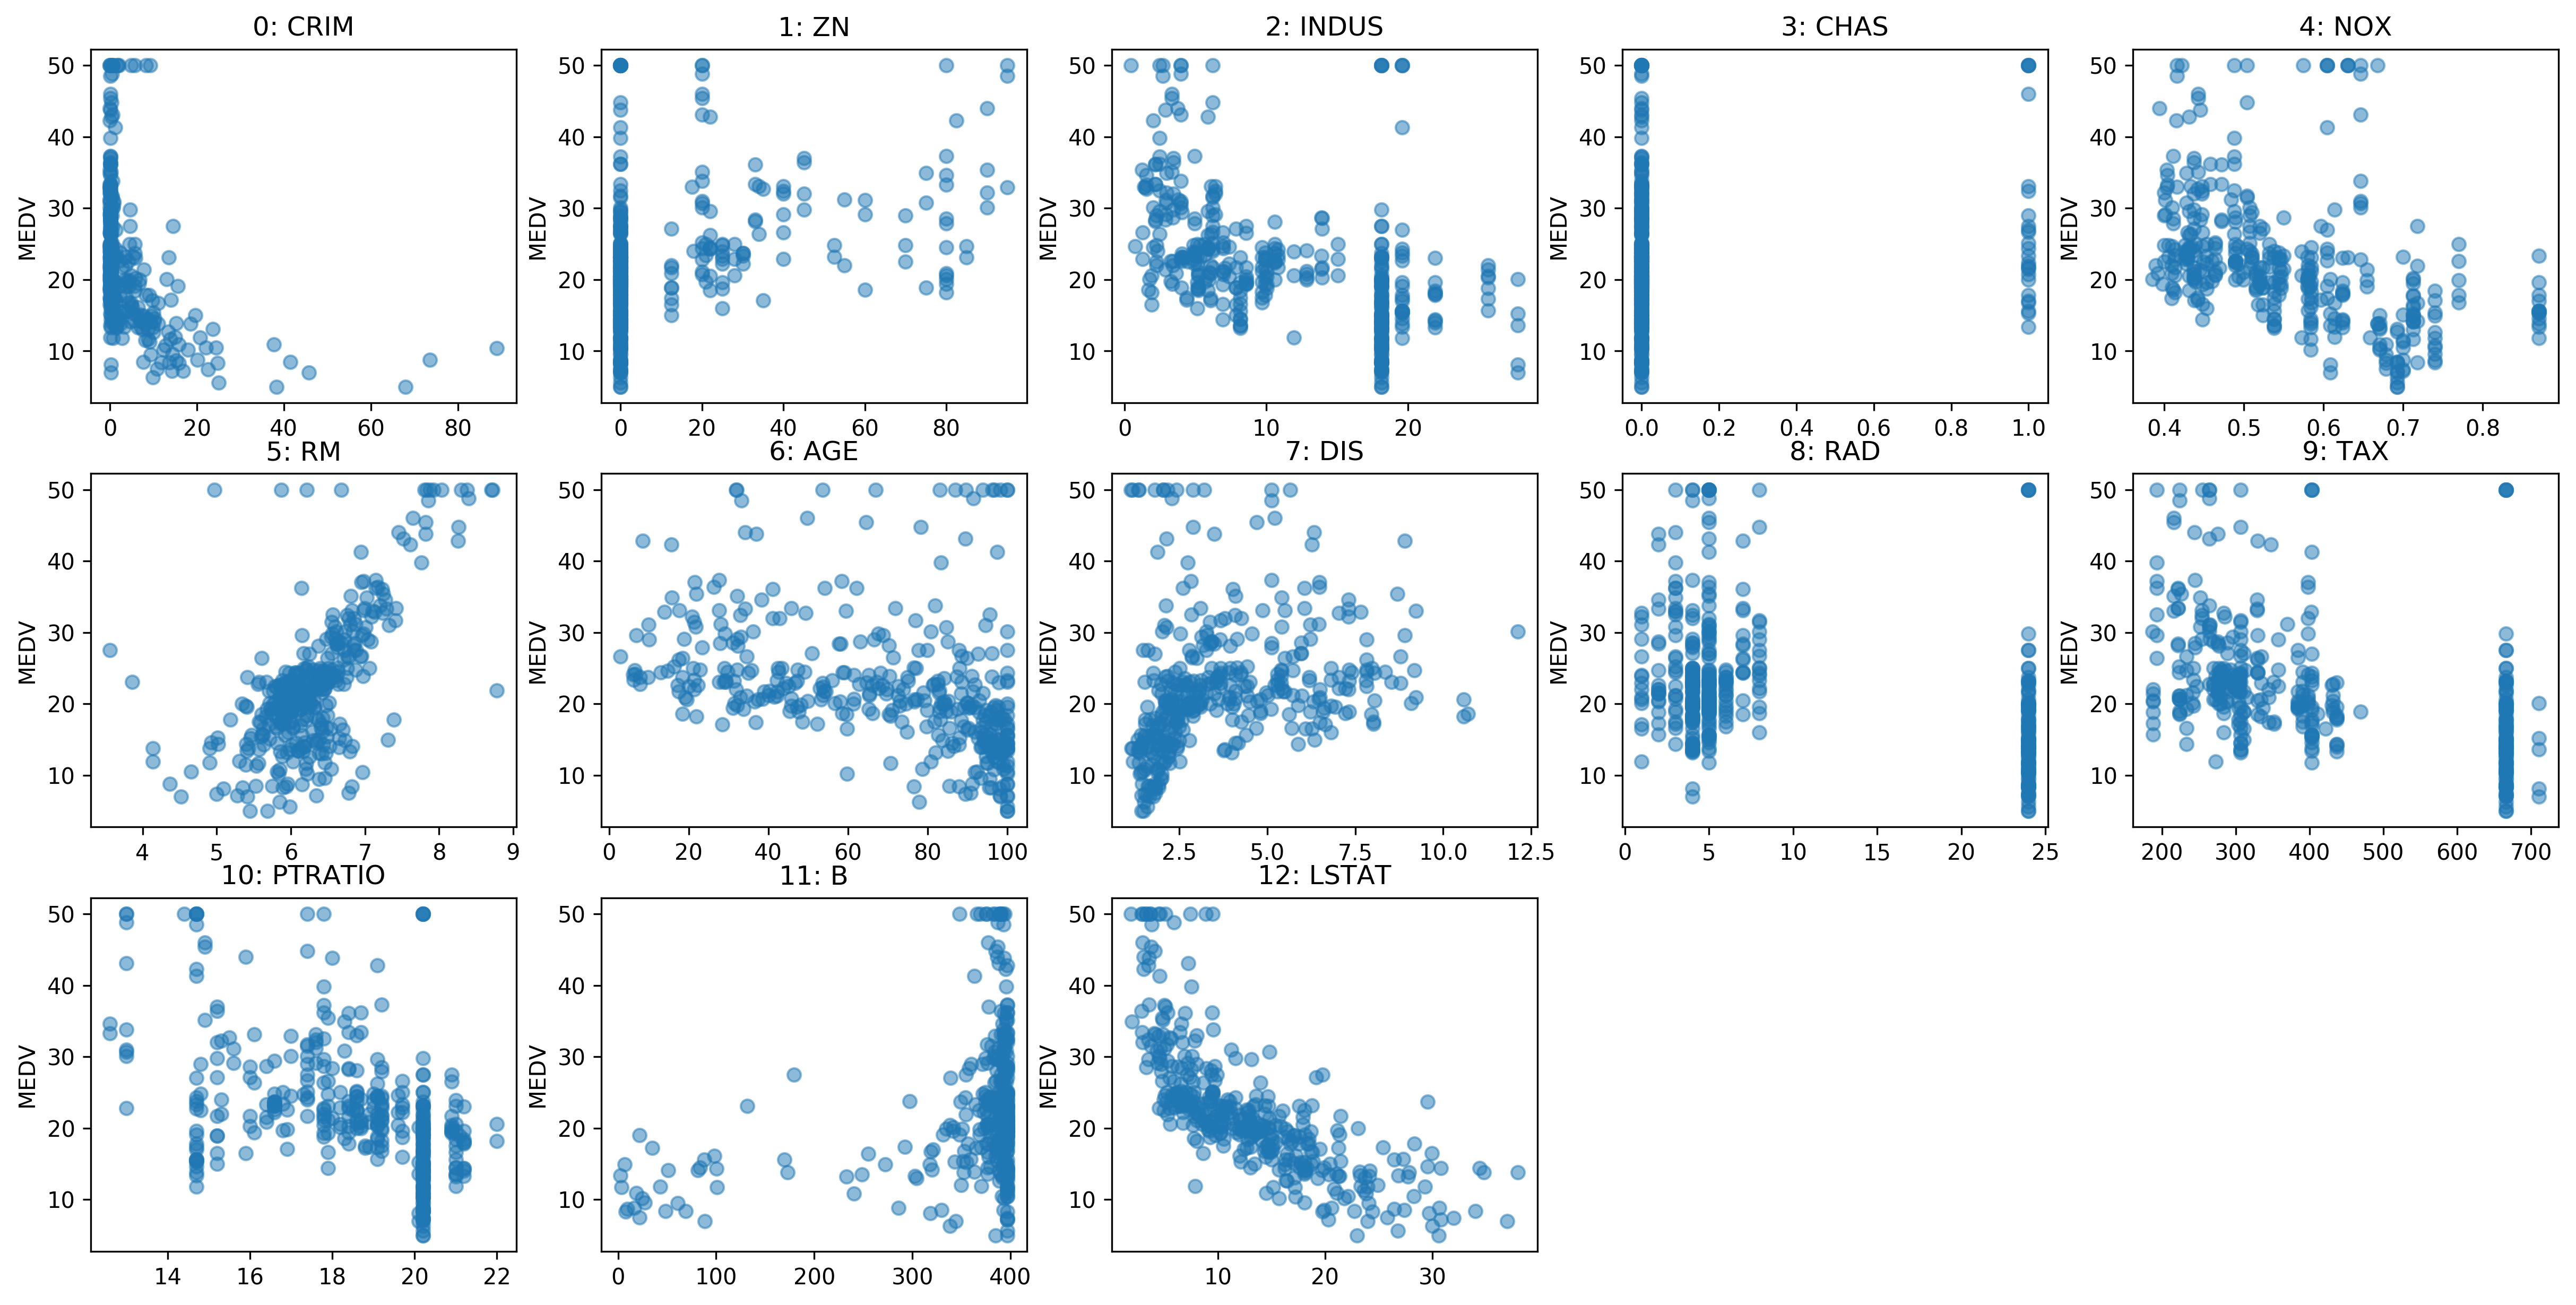

In [63]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_train[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [68]:
np.abs(y_test - pred)

array([ 11.45 ,   4.438,   2.725,   5.102,   1.9  ,   0.151,   0.286,
         3.181,  10.698,   3.372,   9.479,   2.402,   3.307,   0.69 ,
         3.52 ,   1.54 ,   0.554,   1.881,   1.564,   4.605,   3.831,
         1.929,   6.02 ,   6.31 ,   1.739,   4.45 ,   1.298,   2.047,
         0.922,  16.67 ,   2.749,   1.987,   5.441,   1.135,   1.389,
         3.516,   2.012,   1.549,   8.848,   1.164,   6.804,   3.484,
         4.274,   4.276,   7.177,   3.675,   5.199,   0.026,   0.059,
         3.966,   4.533,  11.999,   0.608,   2.642,   5.7  ,   1.823,
         1.939,   6.088,   1.455,   2.612,   4.477,   4.086,   1.027,
         4.711,   4.142,   1.352,   4.145,  16.066,   3.093,   2.444,
         5.065,  10.644,   4.067,   1.672,   4.403,   0.408,   1.006,
         5.516,   0.809,   5.326,   1.53 ,   2.186,   4.605,   1.614,
         0.423,   4.548,   2.496,   1.202,   2.693,   2.775,   2.602,
        23.571,   5.183,   5.266,   6.045,   5.201,   1.756,   3.477,
         0.148,  20.

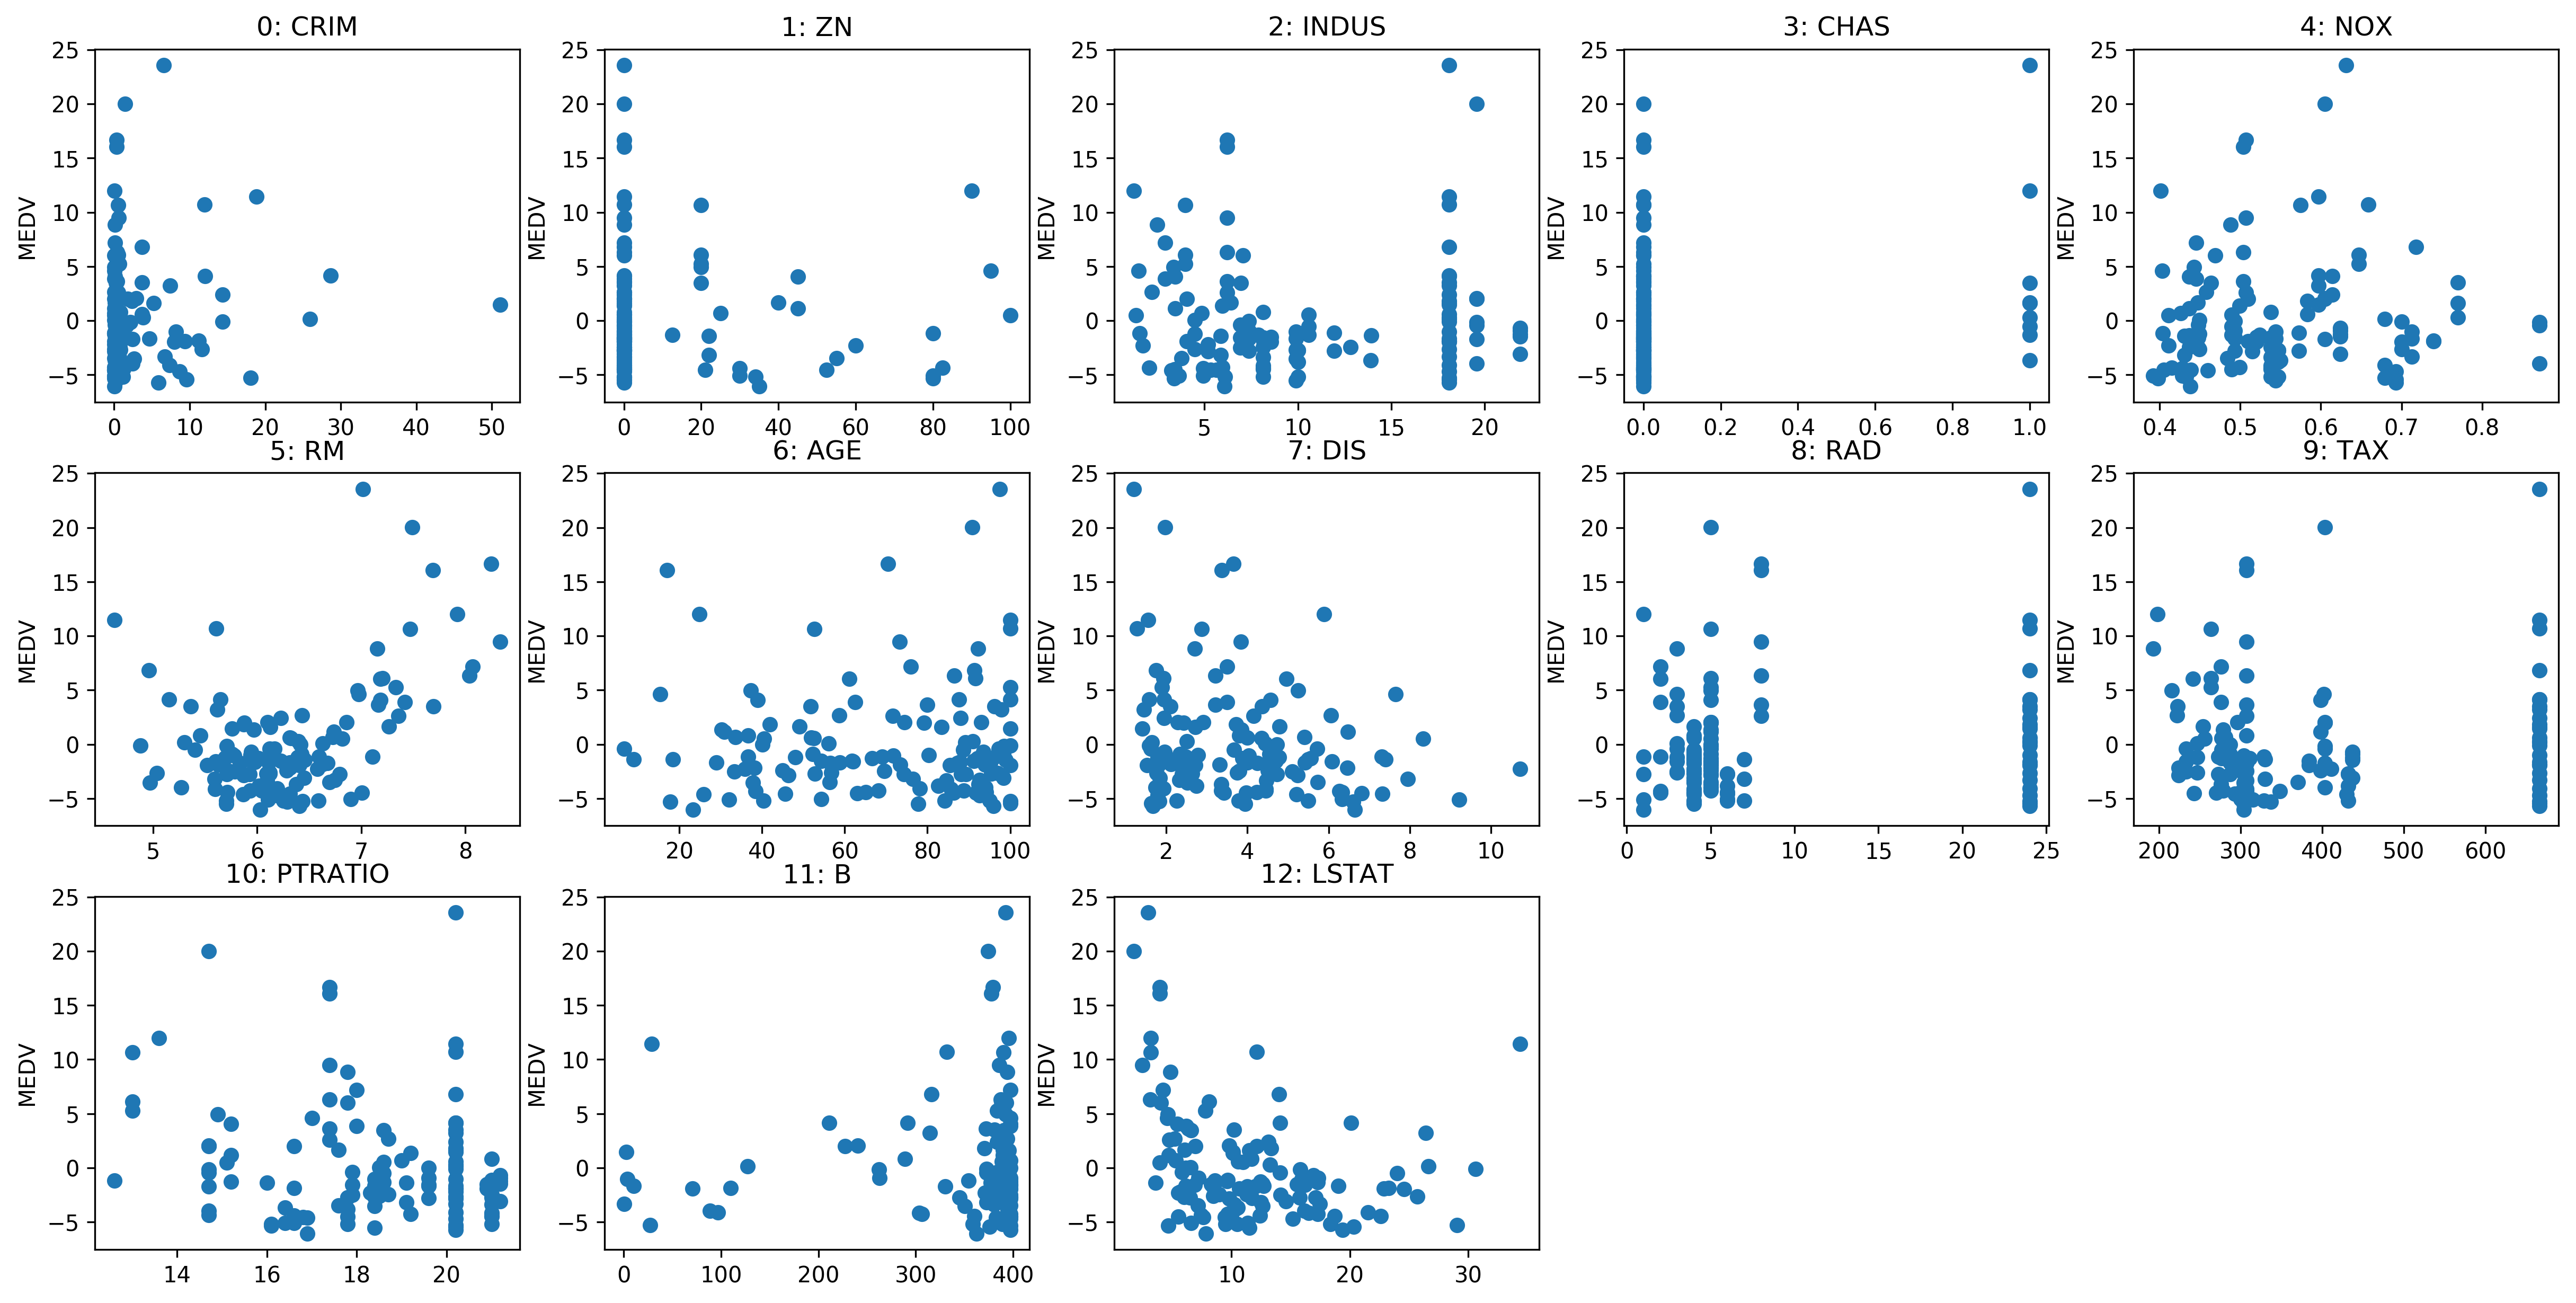

In [76]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_test[:, i], y_test - pred, 'o')
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")